# Description

It takes a GWAS that was imputed and postprocessed (using the PrediXcan scripts here https://github.com/hakyimlab/summary-gwas-imputation) on a random phenotype and verifies that the Manhattan and QQ-plots look fine (without inflation).

# Modules

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Paths

In [3]:
GLS_NULL_SIMS_DIR <- Sys.getenv("PHENOPLIER_RESULTS_GLS_NULL_SIMS")

In [4]:
GLS_NULL_SIMS_DIR

[1] "/opt/data/results/gls/null_sims"

In [5]:
GWAS_DIR <- file.path(GLS_NULL_SIMS_DIR, "final_imputed_gwas")

In [6]:
GWAS_DIR

[1] "/opt/data/results/gls/null_sims/final_imputed_gwas"

# Random pheno 0

## Load data

In [7]:
gwas <- as.data.frame(read_table(file.path(GWAS_DIR, "random.pheno0.glm-imputed.txt.gz")))


── Column specification ────────────────────────────────────────────────────────
cols(
  variant_id = col_character(),
  panel_variant_id = col_character(),
  chromosome = col_character(),
  position = col_double(),
  effect_allele = col_character(),
  non_effect_allele = col_character(),
  current_build = col_character(),
  frequency = col_double(),
  sample_size = col_double(),
  zscore = col_double(),
  pvalue = col_double(),
  effect_size = col_double(),
  standard_error = col_double(),
  imputation_status = col_character(),
  n_cases = col_logical()
)



In [8]:
dim(gwas)

[1] 8348448      15

In [9]:
head(gwas)

,variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,rs141149254,chr1_54490_G_A_b38,chr1,54490,A,G,hg38,0.17766990,312,1.5721500,0.1170090,0.165929,0.105543,original,NA
2,rs188486692,chr1_87021_T_C_b38,chr1,87021,C,T,hg38,0.01165049,312,0.2425878,0.8083247,NA,NA,imputed,NA
3,rs112455420,chr1_263722_C_G_b38,chr1,263722,G,C,hg38,0.12233010,312,1.1572437,0.2471728,NA,NA,imputed,NA
4,rs144425991,chr1_594402_C_T_b38,chr1,594402,T,C,hg38,0.02621359,312,0.8513481,0.3945760,NA,NA,imputed,NA
5,rs55973403,chr1_630555_C_T_b38,chr1,630555,T,C,hg38,0.02135922,312,0.8577492,0.3910309,NA,NA,imputed,NA
6,rs564223368,chr1_630607_C_T_b38,chr1,630607,T,C,hg38,0.01165049,312,-1.6493449,0.0990770,NA,NA,imputed,NA


In [10]:
# gwas <- gwas %>% filter(pvalue >= 0 & pvalue <= 1)

In [11]:
# dim(gwas)

### Extract chromosome

In [12]:
unique(gwas$chromosome)

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22"

In [13]:
gwas$chrom <- gsub("chr([0-9]+)", "\\1", gwas$chromosome)
gwas <- transform(gwas, chrom = as.numeric(chrom))

In [14]:
unique(gwas$chrom)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

## Manhattan plot

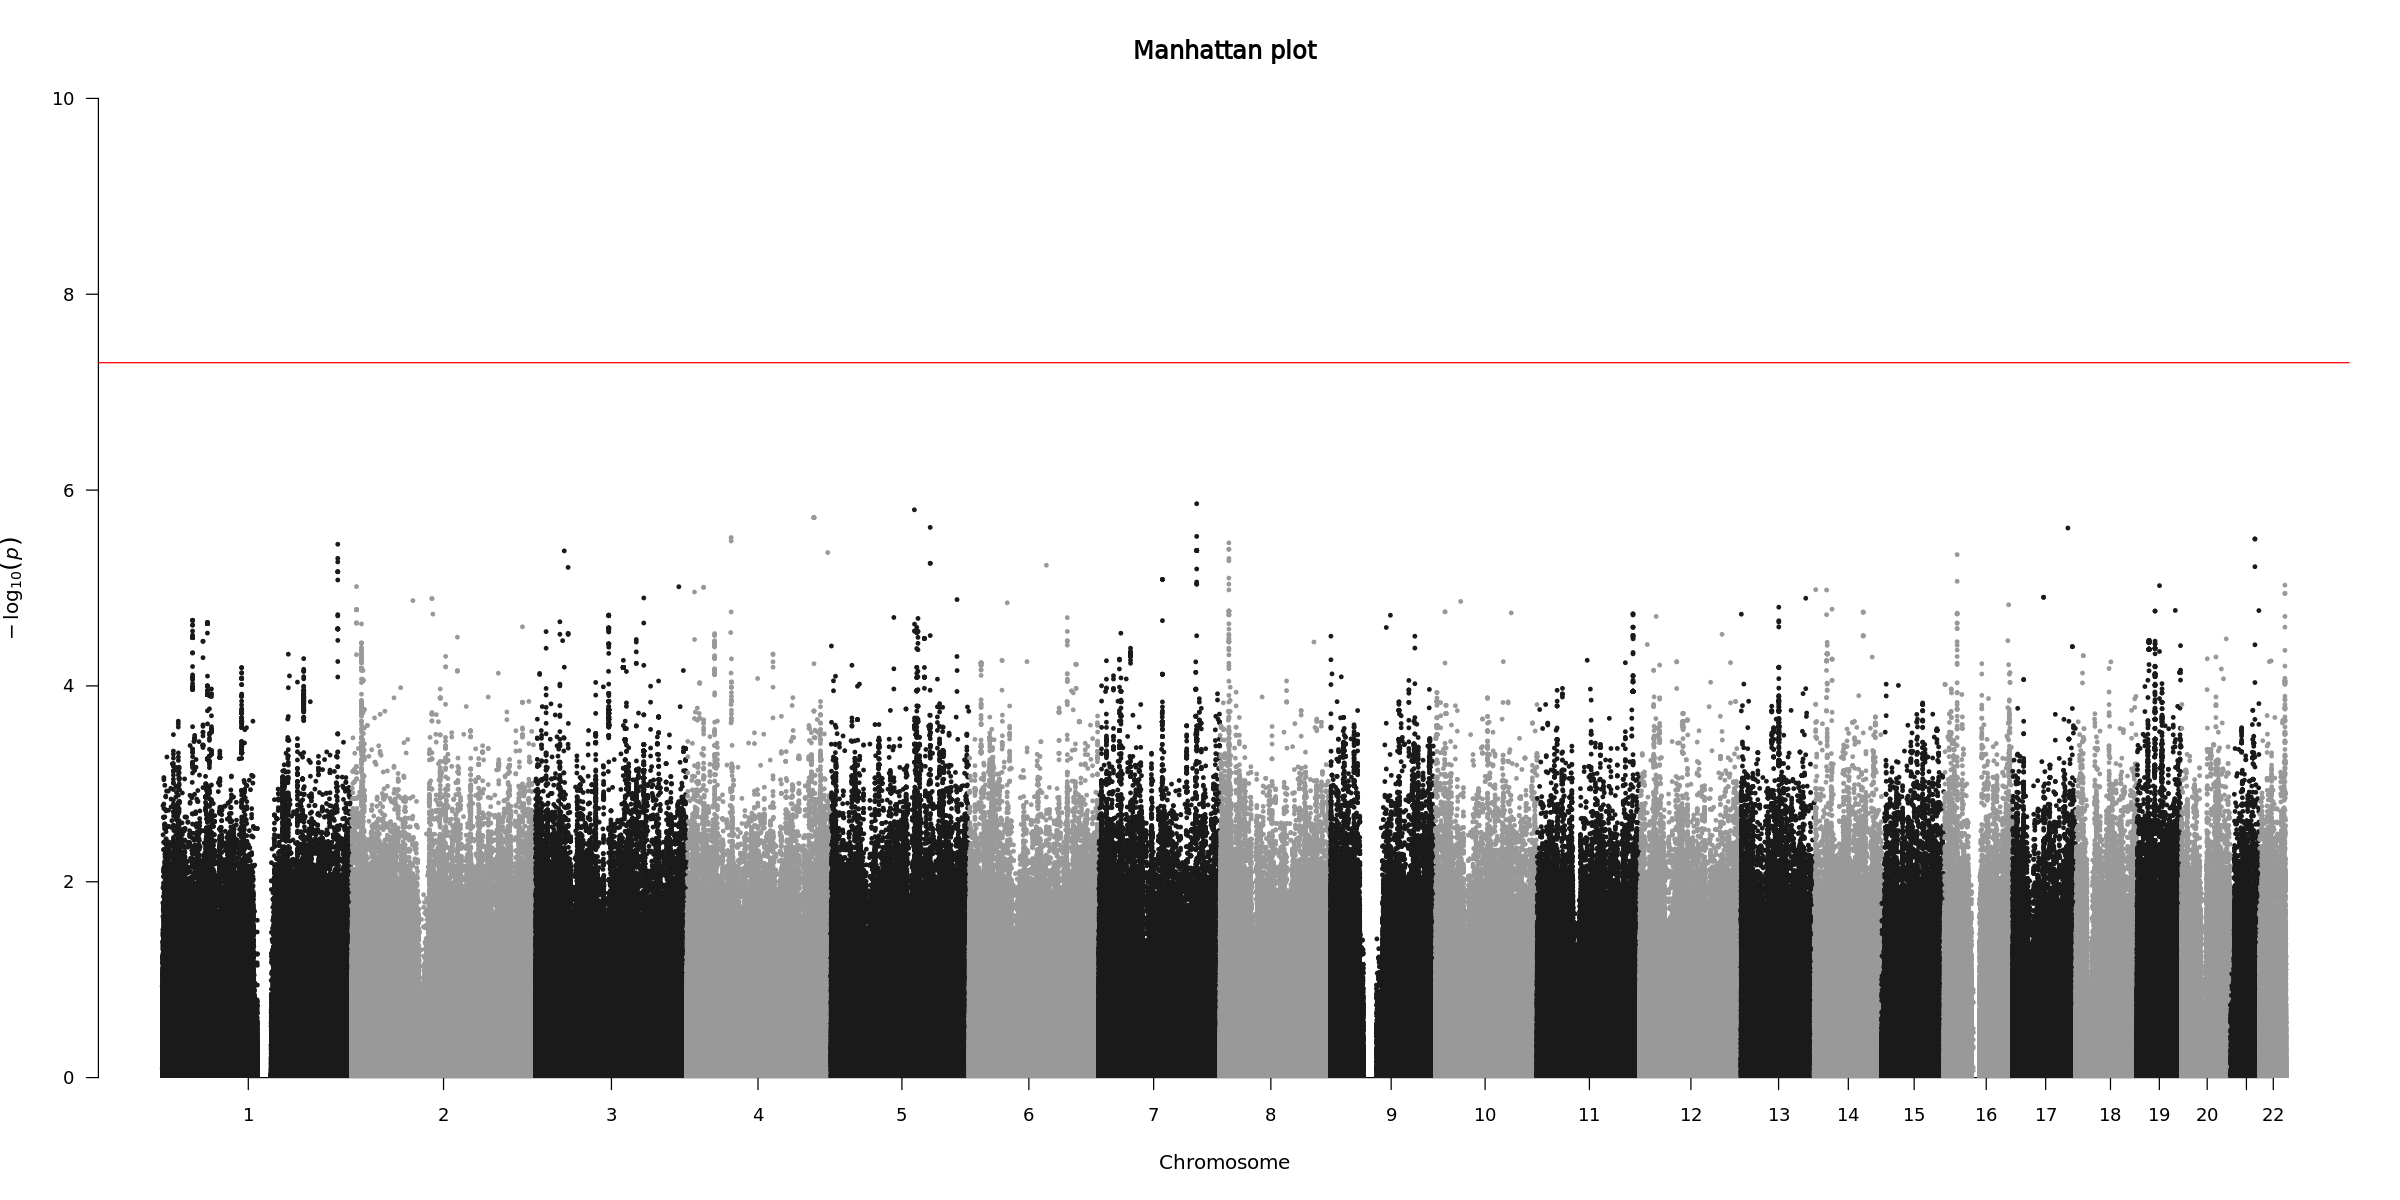

In [15]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "chrom",
  bp = "position",
  p = "pvalue",
  snp = "variant_id",
  main = "Manhattan plot",
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
  ylim = c(0, 10),
)

## QQ-plot

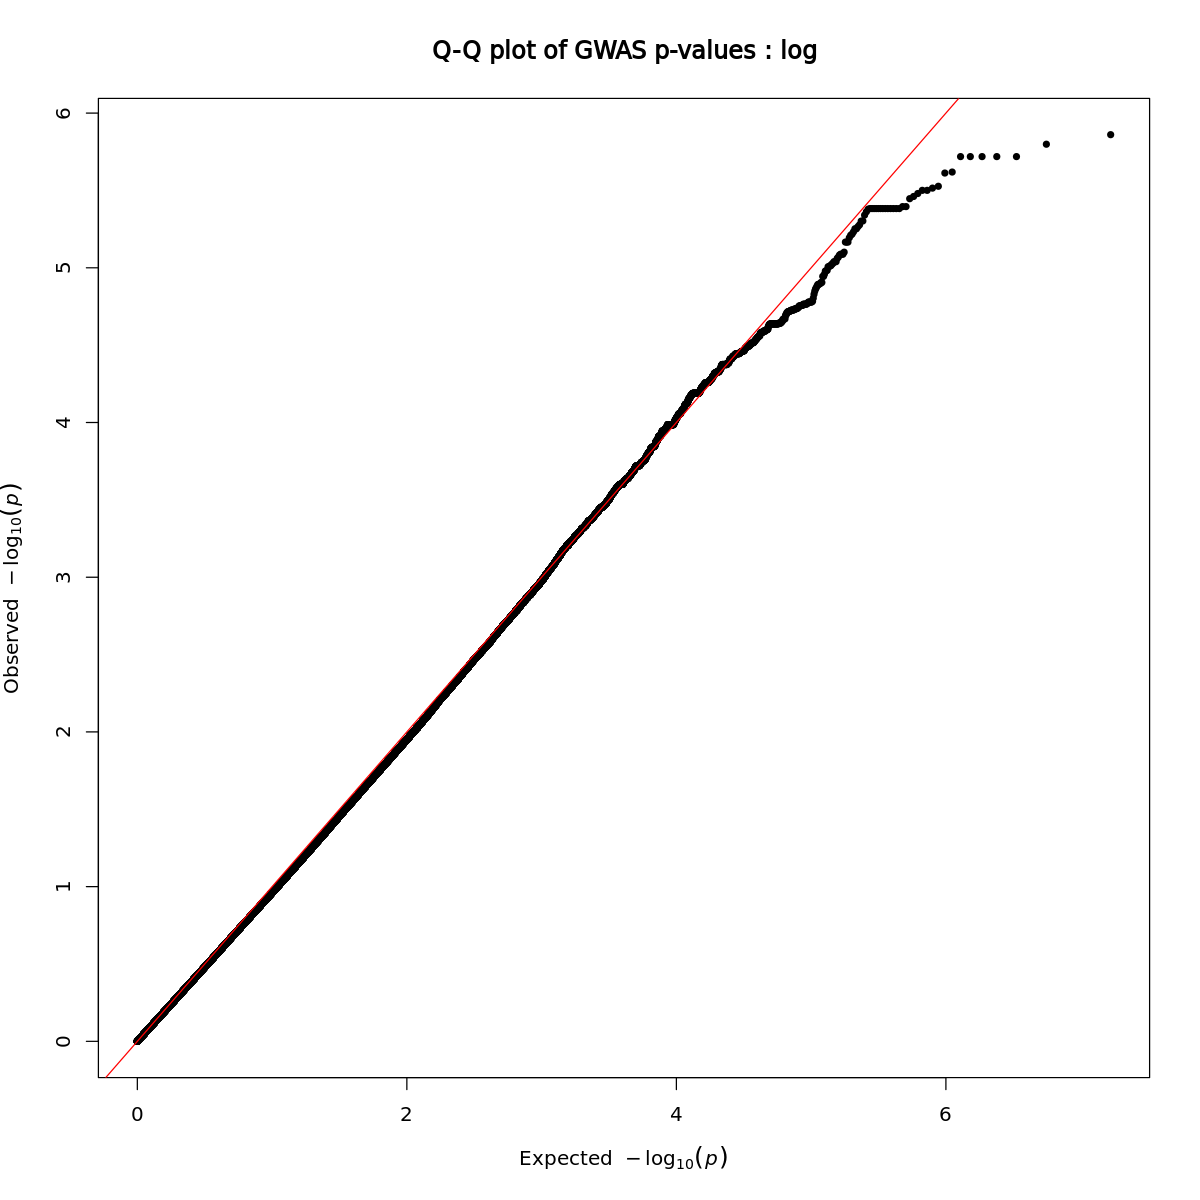

In [16]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(gwas$pvalue, main = "Q-Q plot of GWAS p-values : log")

# Random pheno 28

Random phenotype 28 has the largest inflation factor in the original GWAS summary stats (although within the acceptable limits).

## Load data

In [17]:
gwas <- as.data.frame(read_table(file.path(GWAS_DIR, "random.pheno28.glm-imputed.txt.gz")))


── Column specification ────────────────────────────────────────────────────────
cols(
  variant_id = col_character(),
  panel_variant_id = col_character(),
  chromosome = col_character(),
  position = col_double(),
  effect_allele = col_character(),
  non_effect_allele = col_character(),
  current_build = col_character(),
  frequency = col_double(),
  sample_size = col_double(),
  zscore = col_double(),
  pvalue = col_double(),
  effect_size = col_double(),
  standard_error = col_double(),
  imputation_status = col_character(),
  n_cases = col_logical()
)



In [18]:
dim(gwas)

[1] 8334988      15

In [19]:
head(gwas)

,variant_id,panel_variant_id,chromosome,position,effect_allele,non_effect_allele,current_build,frequency,sample_size,zscore,pvalue,effect_size,standard_error,imputation_status,n_cases
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,rs141149254,chr1_54490_G_A_b38,chr1,54490,A,G,hg38,0.17766990,312,-0.9516320,0.3420790,-0.100138,0.105227,original,NA
2,rs188486692,chr1_87021_T_C_b38,chr1,87021,C,T,hg38,0.01165049,312,-1.0752045,0.2822832,NA,NA,imputed,NA
3,rs112455420,chr1_263722_C_G_b38,chr1,263722,G,C,hg38,0.12233010,312,1.0844639,0.2781591,NA,NA,imputed,NA
4,rs144425991,chr1_594402_C_T_b38,chr1,594402,T,C,hg38,0.02621359,312,-0.2139557,0.8305816,NA,NA,imputed,NA
5,rs55973403,chr1_630555_C_T_b38,chr1,630555,T,C,hg38,0.02135922,312,-0.2227171,0.8237557,NA,NA,imputed,NA
6,rs564223368,chr1_630607_C_T_b38,chr1,630607,T,C,hg38,0.01165049,312,1.0230826,0.3062688,NA,NA,imputed,NA


In [20]:
# gwas <- gwas %>% filter(P >= 0 & P <= 1)

In [21]:
# dim(gwas)

### Extract chromosome

In [22]:
unique(gwas$chromosome)

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22"

In [23]:
gwas$chrom <- gsub("chr([0-9]+)", "\\1", gwas$chromosome)
gwas <- transform(gwas, chrom = as.numeric(chrom))

In [24]:
unique(gwas$chrom)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

## Manhattan plot

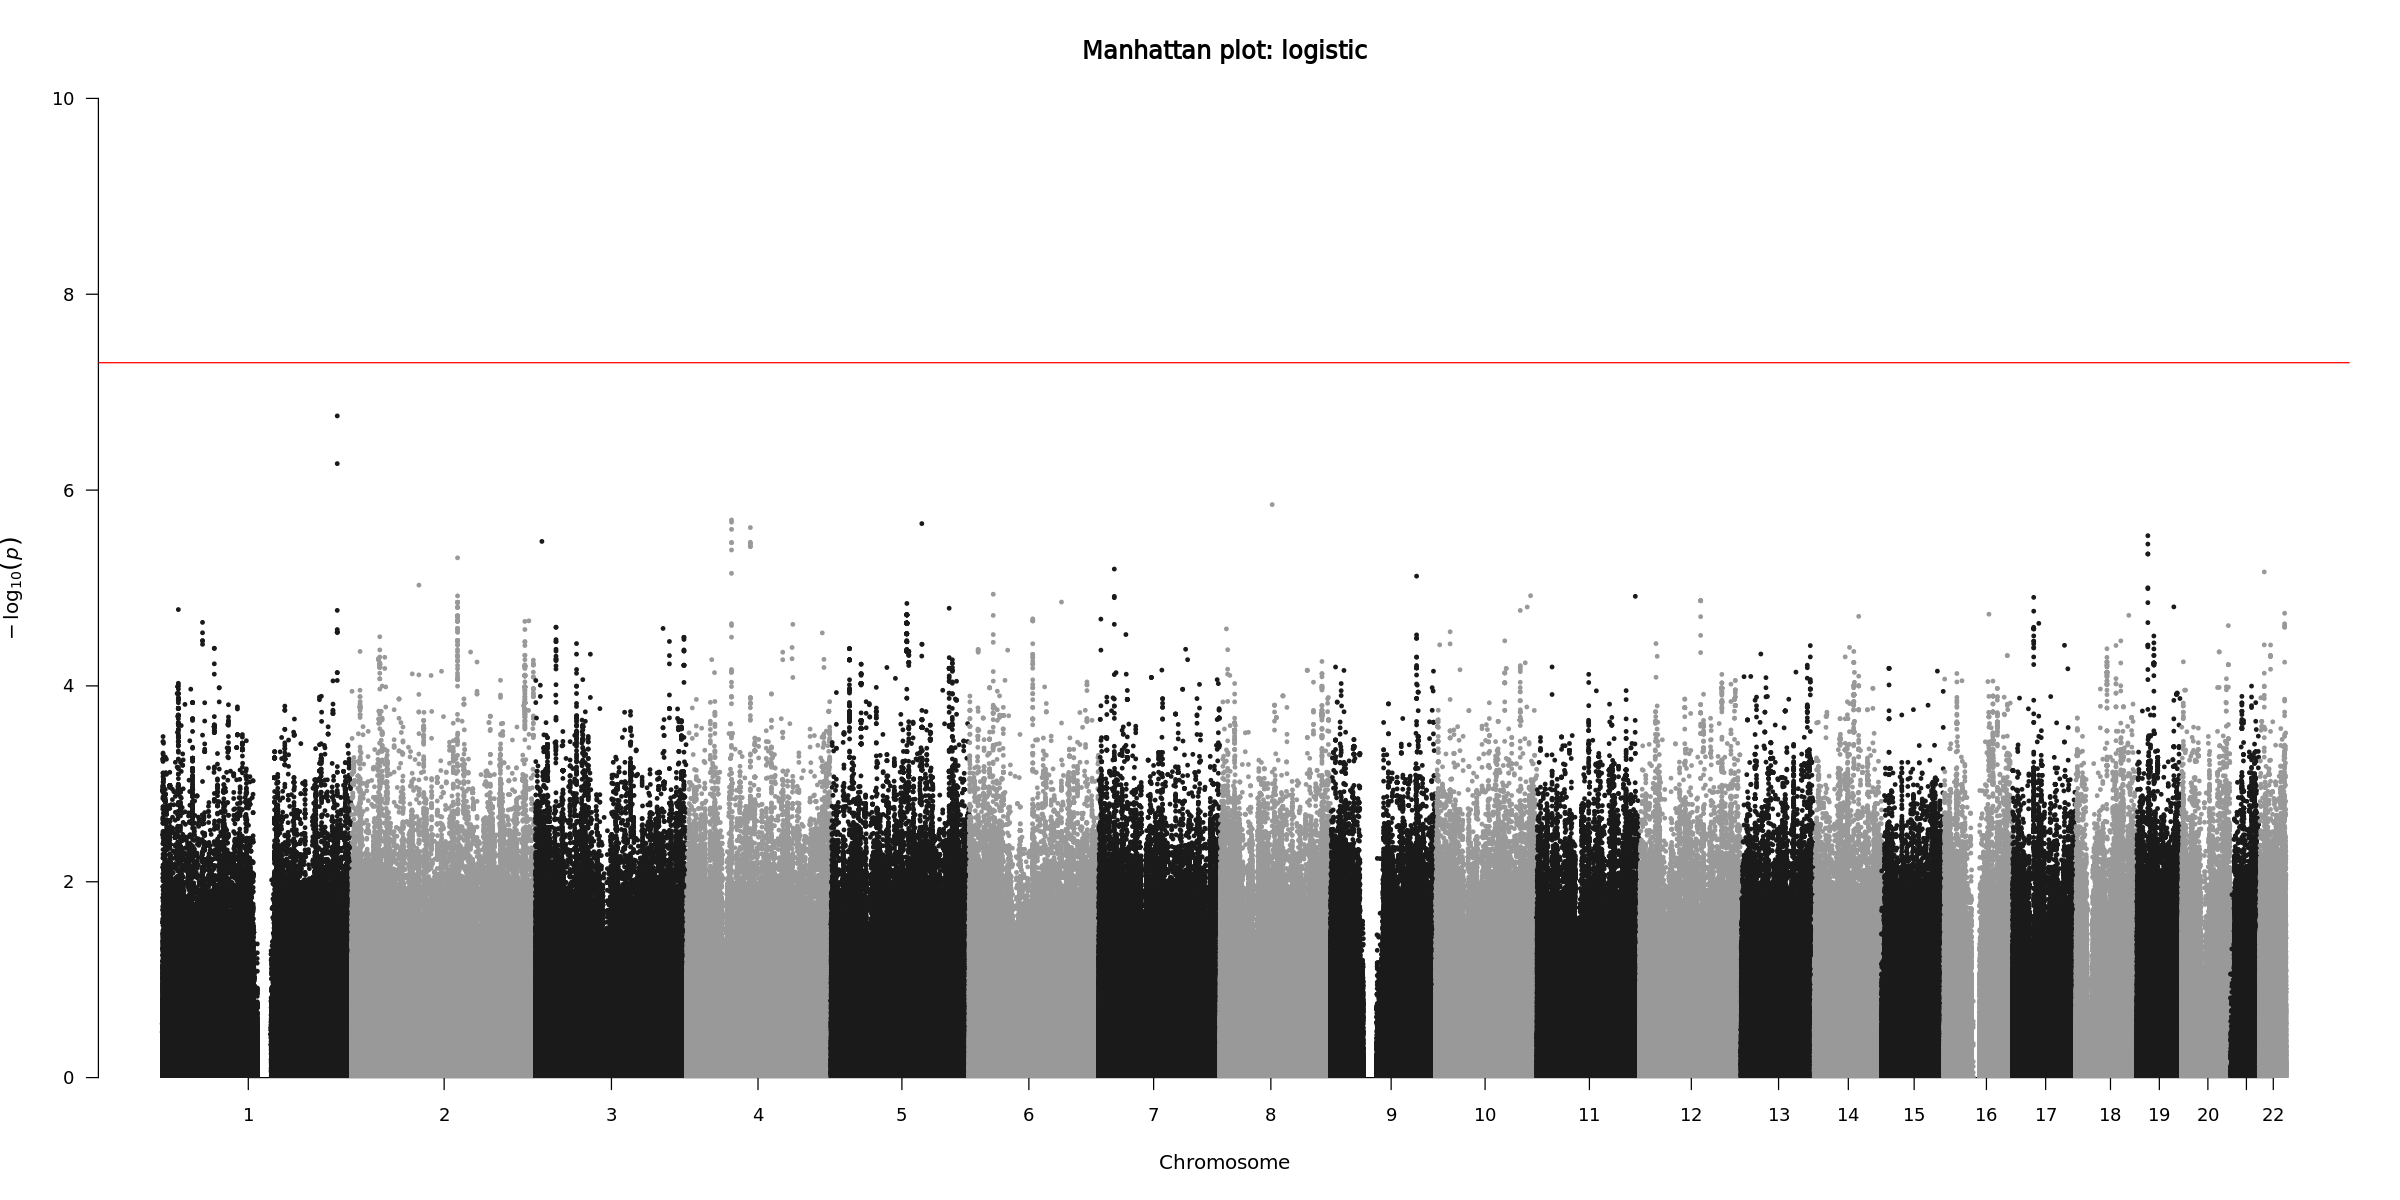

In [25]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "chrom",
  bp = "position",
  p = "pvalue",
  snp = "variant_id",
  main = "Manhattan plot: logistic",
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
  ylim = c(0, 10),
)

## QQ-plot

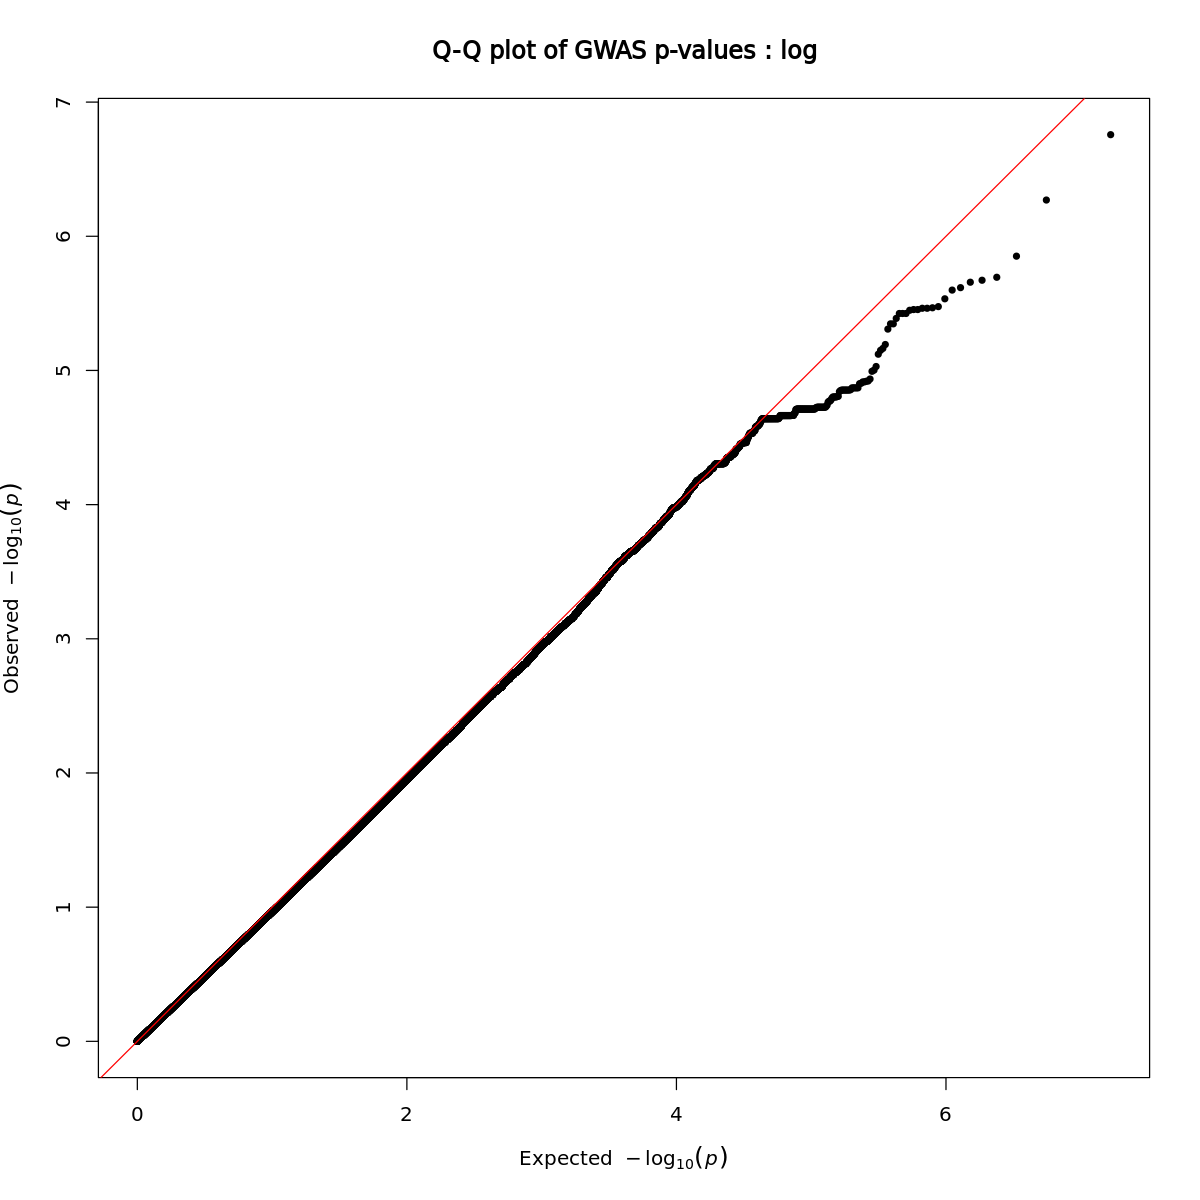

In [26]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(gwas$pvalue, main = "Q-Q plot of GWAS p-values : log")